In [26]:
import qlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import os
from utils import retrieve_data  # 确保这个脚本与你的 utils.py 文件在同一目录下

# 设置数据存储路径
output_path = "./u_data/"  # 替换为你想存储数据的路径

# 确保输出路径存在
if not os.path.exists(output_path):
    os.makedirs(output_path)

# 调用函数获取数据
retrieve_data(output_path)

# 这将会根据你的 utils.py 脚本下载和存储数据

[76925:MainThread](2023-11-11 13:22:57,447) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[76925:MainThread](2023-11-11 13:22:57,450) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[76925:MainThread](2023-11-11 13:22:57,452) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': PosixPath('/home/vscode/.qlib/qlib_data/us_data')}


In [1]:
import os
from utils import retrieve_data  # 确保这个脚本与你的 utils.py 文件在同一目录下

# 设置数据存储路径
output_path = "./us_data/"  # 替换为你想存储数据的路径

# 确保输出路径存在
if not os.path.exists(output_path):
    os.makedirs(output_path)

# 调用函数获取数据
retrieve_data(output_path)

# 这将会根据你的 utils.py 脚本下载和存储数据

[78093:MainThread](2023-11-11 14:30:08,007) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[78093:MainThread](2023-11-11 14:30:08,747) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[78093:MainThread](2023-11-11 14:30:08,748) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': PosixPath('/home/vscode/.qlib/qlib_data/us_data')}


In [18]:

# 设置包含CSV文件的目录
directory = "/homes/Adam/DL_A3/us_data/test"

# 遍历目录中的所有CSV文件
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 删除包含空值的行
        df_cleaned = df.dropna()
        
        # 将清洗后的数据保存回CSV
        df_cleaned.to_csv(file_path, index=False)

print("Completed removing rows with missing values from all CSV files.")

# 因为数据量较大所以直接删除包含空值的row，空值是因为头部信息没有包含历史信息导致的


Completed removing rows with missing values from all CSV files.


In [15]:
df = pd.read_csv('/homes/Adam/DL_A3/us_data/train/AAPL.csv')
df.dropna(inplace=True)



/tmp/ipykernel_78093/3741788573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


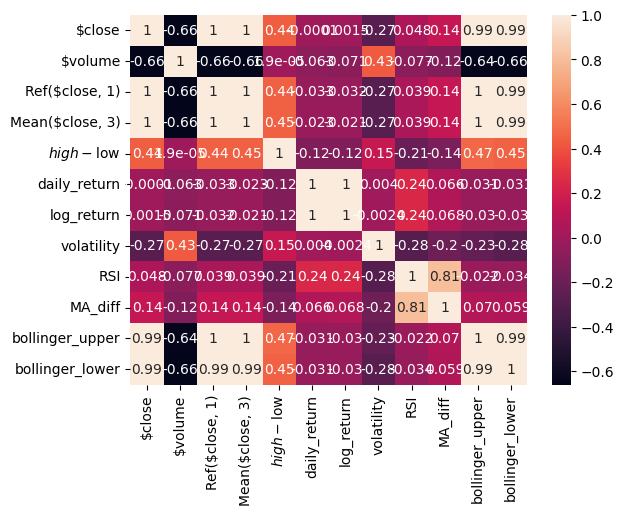

In [16]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
# 计算相关系数矩阵
corr_matrix = df.corr()

# 将相关系数矩阵转换为一个DataFrame，并排除自相关行
corr_matrix_df = corr_matrix.unstack().reset_index()
corr_matrix_df.columns = ['Feature_1', 'Feature_2', 'Correlation']
corr_matrix_df = corr_matrix_df[corr_matrix_df['Feature_1'] != corr_matrix_df['Feature_2']]

# 确定相关性阈值
high_corr_threshold = 0.8
low_corr_threshold = -0.6

# 筛选出高度相关和中等负相关的特征对
high_corr_features = corr_matrix_df[corr_matrix_df['Correlation'] > high_corr_threshold]
medium_negative_corr_features = corr_matrix_df[(corr_matrix_df['Correlation'] < 0) & (corr_matrix_df['Correlation'] > low_corr_threshold)]

# 输出这些特征对
print("Highly correlated features:")
print(high_corr_features)

print("\nModerately negatively correlated features:")
print(medium_negative_corr_features)

# 特征选择建议
# 如果特征对高度相关，您可能会考虑从模型中移除其中的一个或使用PCA等方法降维
# 对于中等负相关的特征，它们可以提供不同的信息，可以保留

Highly correlated features:
           Feature_1        Feature_2  Correlation
2             $close   Ref($close, 1)     0.999348
3             $close  Mean($close, 3)     0.999631
10            $close  bollinger_upper     0.994938
11            $close  bollinger_lower     0.993840
24    Ref($close, 1)           $close     0.999348
27    Ref($close, 1)  Mean($close, 3)     0.999859
34    Ref($close, 1)  bollinger_upper     0.995519
35    Ref($close, 1)  bollinger_lower     0.994436
36   Mean($close, 3)           $close     0.999631
38   Mean($close, 3)   Ref($close, 1)     0.999859
46   Mean($close, 3)  bollinger_upper     0.995787
47   Mean($close, 3)  bollinger_lower     0.994705
66      daily_return       log_return     0.999784
77        log_return     daily_return     0.999784
105              RSI          MA_diff     0.805484
116          MA_diff              RSI     0.805484
120  bollinger_upper           $close     0.994938
122  bollinger_upper   Ref($close, 1)     0.995519
123

/tmp/ipykernel_78093/42790953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [19]:

train_path = '/homes/Adam/DL_A3/us_data/train'
all_files = os.listdir(train_path)

# 创建空的DataFrame来存储合并后的数据
full_data = pd.DataFrame()

for filename in all_files:
    current_data = pd.read_csv(os.path.join(train_path, filename))
    full_data = full_data.append(current_data, ignore_index=True)


/tmp/ipykernel_78093/2412735135.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data = full_data.append(current_data, ignore_index=True)
/tmp/ipykernel_78093/2412735135.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data = full_data.append(current_data, ignore_index=True)
/tmp/ipykernel_78093/2412735135.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data = full_data.append(current_data, ignore_index=True)
/tmp/ipykernel_78093/2412735135.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data = full_data.append(current_data, ignore_index=True)
/tmp/ipykernel_78093/2412735135.py:9: FutureWarning: The fra

In [24]:
full_data

,instrument,datetime,$close,$volume,"Ref($close, 1)","Mean($close, 3)",$high-$low,daily_return,log_return,volatility,RSI,MA_diff,bollinger_upper,bollinger_lower,future_return
0,MMM,2010-02-01,2.075505,140791970.0,2.076794,2.078601,0.024512,-0.000621,-0.000621,0.011106,30.802435,-0.040096,2.210378,2.065976,-0.000124
1,MMM,2010-02-02,2.075247,181769550.0,2.075505,2.075849,0.031994,-0.000124,-0.000124,0.011083,30.240110,-0.040182,2.212273,2.057399,0.013304
2,MMM,2010-02-03,2.102855,131823624.0,2.075247,2.084536,0.047734,0.013304,0.013216,0.011916,38.554300,-0.039924,2.212266,2.054826,-0.028098
3,MMM,2010-02-04,2.043768,205899600.0,2.102855,2.073957,0.059344,-0.028098,-0.028501,0.013829,32.080080,-0.040010,2.215082,2.040502,-0.008458
4,MMM,2010-02-05,2.026481,209597010.0,2.043768,2.057701,0.057796,-0.008458,-0.008494,0.013871,30.695446,-0.041541,2.217884,2.024309,-0.012860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026855,STR,2017-08-09,0.268883,165628.0,0.281915,0.275621,0.011489,-0.046226,-0.047329,0.068188,56.051902,-0.005663,0.324468,0.210223,0.028685
1026856,STR,2017-08-10,0.276596,478836.0,0.268883,0.275798,0.010745,0.028684,0.028281,0.067975,58.574226,-0.002631,0.324932,0.213430,0.009615
1026857,STR,2017-08-11,0.279255,905784.0,0.276596,0.274911,0.010160,0.009615,0.009569,0.067880,59.104116,-0.004014,0.325428,0.216683,-0.008571
1026858,STR,2017-10-20,0.276862,122952.0,0.276596,0.282713,0.014894,0.000962,0.000961,0.049303,51.134014,-0.001301,0.295671,0.254622,0.048991


In [27]:
from sklearn.preprocessing import StandardScaler

# 假设full_data已经包含合并后的数据，且'$close'是股票的收盘价列名
# 计算未来收益率作为目标变量
# 注意：这会引入一个NaN值在最后一个观察点，因为没有未来的数据来计算收益率
full_data['future_return'] = full_data['$close'].pct_change().shift(-1)

# 删除任何包含NaN值的行，尤其是因为shift(-1)引入的最后一行
full_data.dropna(inplace=True)


# 删除非数值型的列，例如股票代码列
X = full_data.select_dtypes(include=[np.number]).drop('future_return', axis=1)
y = full_data['future_return']


# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
from sklearn.ensemble import RandomForestRegressor

# 初始化随机森林模型
rf = RandomForestRegressor(n_estimators=100)

# 训练模型
rf.fit(X_scaled, y)

# 获取特征重要性
importances = rf.feature_importances_

# 将特征重要性与特征名称配对
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# 按重要性排序
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# 显示特征重要性
print(feature_importances)


            feature    importance
6        log_return  4.828296e-01
7        volatility  2.019865e-01
1           $volume  1.316565e-01
8               RSI  1.070950e-01
5      daily_return  7.027419e-02
4        $high-$low  2.375668e-03
2    Ref($close, 1)  1.705310e-03
11  bollinger_lower  1.454631e-03
3   Mean($close, 3)  3.872579e-04
0            $close  2.354233e-04
10  bollinger_upper  8.293882e-10
9           MA_diff  7.648435e-10


epoch:   0 loss: 0.00611556
epoch:   1 loss: 0.00725606


epoch:   2 loss: 0.00425401
epoch:   3 loss: 0.00550576
epoch:   4 loss: 0.00911905
epoch:   5 loss: 0.00506798
epoch:   6 loss: 0.00716678
epoch:   7 loss: 0.00430421
epoch:   8 loss: 0.00599914
epoch:   9 loss: 0.00723717
epoch:  10 loss: 0.00523343
epoch:  11 loss: 0.00766487
epoch:  12 loss: 0.00537118
epoch:  13 loss: 0.00642663
epoch:  14 loss: 0.00471157
epoch:  15 loss: 0.00433126
epoch:  16 loss: 0.00431760
epoch:  17 loss: 0.00614512
epoch:  18 loss: 0.00463415
epoch:  19 loss: 0.00311725
epoch:  20 loss: 0.00385108
epoch:  21 loss: 0.00690020
epoch:  22 loss: 0.00483494
epoch:  23 loss: 0.00418205
epoch:  24 loss: 0.00854255
epoch:  25 loss: 0.00813689
epoch:  26 loss: 0.00417664
epoch:  27 loss: 0.00359552
epoch:  28 loss: 0.00402183
epoch:  29 loss: 0.00937579
epoch:  30 loss: 0.00724696
epoch:  31 loss: 0.00531865
epoch:  32 loss: 0.01285599
epoch:  33 loss: 0.00749943
epoch:  34 loss: 0.00455499
epoch:  35 loss: 0.00386823
epoch:  36 loss: 0.00470662
epoch:  37 loss: 0.0

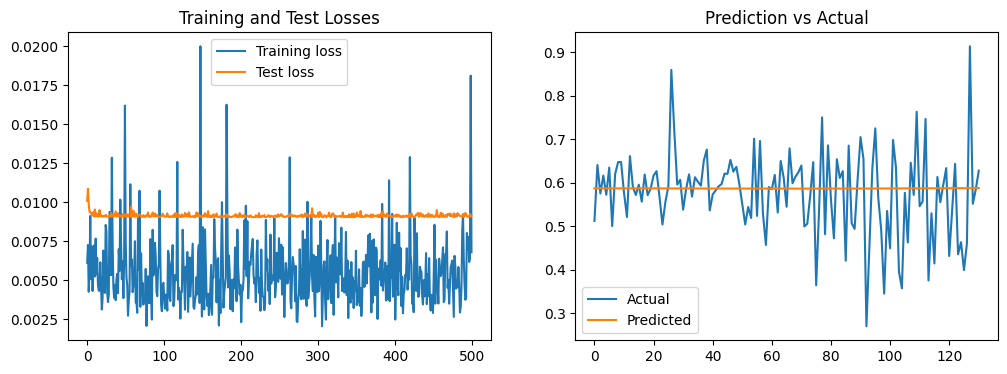

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 定义设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 加载数据
train_df = pd.read_csv('/homes/Adam/DL_A3/us_data/train/AAPL.csv')
test_df = pd.read_csv('/homes/Adam/DL_A3/us_data/test/AAPL.csv')

# 特征选择
# top_features = ['log_return', 'volatility', '$volume', 'RSI', 'daily_return','$high-$low','Ref($close, 1)','bollinger_lower','Mean($close, 3)','$close','MA_diff','bollinger_upper']
top_features = ['$volume', 'daily_return','$high-$low','Ref($close, 1)','Mean($close, 3)','$close']

X_train = train_df[top_features]
X_test = test_df[top_features]

# 目标变量
y_train = train_df['$close'].pct_change().shift(-1).dropna()
y_test = test_df['$close'].pct_change().shift(-1).dropna()

# 数据预处理
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# 创建时间序列数据
def create_sequences(input_data, target_data, seq_length):
    sequences = []
    targets = []
    for i in range(len(input_data) - seq_length):
        seq = input_data[i:(i+seq_length)]
        if (i+seq_length) < len(target_data):
            target = target_data[i+seq_length]
            sequences.append(seq)
            targets.append(target)
    return np.array(sequences), np.array(targets)

seq_length = 100  # 设置时间戳长度
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, seq_length)

# 转换为PyTorch tensors
X_train_seq = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
y_train_seq = torch.tensor(y_train_seq, dtype=torch.float32).to(device)
X_test_seq = torch.tensor(X_test_seq, dtype=torch.float32).to(device)
y_test_seq = torch.tensor(y_test_seq, dtype=torch.float32).to(device)

# 定义LSTM模型
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, num_layers):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

input_size = len(top_features)
hidden_layer_size = 30
output_size = 1
num_layers = 2

model = LSTM(input_size=input_size, hidden_layer_size=hidden_layer_size, output_size=output_size, num_layers=num_layers)
model = model.to(device)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # 添加L2正则化

# 训练模型
epochs = 500
train_losses = []
test_losses = []

for i in range(epochs):
    model.train()
    for seq, labels in DataLoader(TensorDataset(X_train_seq, y_train_seq), batch_size=64, shuffle=True):
        optimizer.zero_grad()
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
    train_losses.append(single_loss.item())
    
    # 测试模型
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_seq)
        test_loss = loss_function(y_test_pred, y_test_seq)
    test_losses.append(test_loss.item())

    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

# 计算夏普比率
risk_free_rate = 0  # 设定无风险利率为0
y_test_pred_np = y_test_pred.cpu().numpy()
y_test_actual_np = y_test_seq.cpu().numpy()
excess_daily_return = y_test_pred_np - risk_free_rate
sharpe_ratio = np.mean(excess_daily_return) / np.std(excess_daily_return)
annual_sharpe_ratio = (252 ** 0.5) * sharpe_ratio

print(f"Annualized Sharpe Ratio: {annual_sharpe_ratio}")

# 可视化训练和测试损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.title('Training and Test Losses')

# 可视化预测和实际值
plt.subplot(1, 2, 2)
plt.plot(y_test_actual_np.flatten(), label='Actual')
plt.plot(y_test_pred_np.flatten(), label='Predicted')
plt.legend()
plt.title('Prediction vs Actual')
plt.show()
